6210407960 นายธนกร วงษ์สนิท

A public open dataset of chest X-ray and CT images of patients.<br>
ดาวน์โหลดข้อมูลรูปภาพได้จาก: __[ข้อมูลรูปภาพ](https://github.com/ieee8023/covid-chestxray-dataset)__

In [45]:
import pandas as pd

In [47]:
df = pd.read_csv("./OriginalDataset/covid-chestxray-dataset-master/metadata.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               950 non-null    object 
 1   offset                  697 non-null    float64
 2   sex                     870 non-null    object 
 3   age                     713 non-null    float64
 4   finding                 950 non-null    object 
 5   RT_PCR_positive         593 non-null    object 
 6   survival                361 non-null    object 
 7   intubated               248 non-null    object 
 8   intubation_present      250 non-null    object 
 9   went_icu                397 non-null    object 
 10  in_icu                  335 non-null    object 
 11  needed_supplemental_O2  90 non-null     object 
 12  extubated               37 non-null     object 
 13  temperature             78 non-null     float64
 14  pO2_saturation          119 non-null    fl

In [48]:
df.view.unique()

array(['PA', 'AP', 'L', 'Axial', 'AP Supine', 'Coronal', 'AP Erect'],
      dtype=object)

column ที่ใช้
- finding
- view column
<br>a front view (PA, or posteroanterior) เอา AP ด้วย
, [ไม่เอา a side view (LL, or latero-lateral) ]
- modality column
<br>x-ray
- filename

In [49]:
df.modality.unique()

array(['X-ray', 'CT'], dtype=object)

In [51]:
dd = df[df['modality'].str.contains(r'.*x-ray.*', flags=re.IGNORECASE, regex=True)]
dd.loc[:,['finding','view','filename']]

,finding,view,filename
0,Pneumonia/Viral/COVID-19,PA,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1,Pneumonia/Viral/COVID-19,PA,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2,Pneumonia/Viral/COVID-19,PA,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3,Pneumonia/Viral/COVID-19,PA,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4,Pneumonia/Viral/COVID-19,PA,nejmc2001573_f1a.jpeg
...,...,...,...
945,Pneumonia,AP,072ecaf8c60a81980abb57150a8016_jumbo-9.jpeg
946,Pneumonia,AP,ff33c406392b968d483174c97eb857_jumbo-9.jpeg
947,Pneumonia,PA,000001-266.jpg
948,Pneumonia,AP,000001-272.jpg


In [52]:
import re
dfUse = df[df['finding'].str.contains(r'.*Covid.*', flags=re.IGNORECASE, regex=True)]
dfUse = dfUse[df['modality'].str.contains(r'.*x-ray.*', flags=re.IGNORECASE, regex=True)]
dfUse = dfUse[df['view'].str.contains(r'pa|ap', flags=re.IGNORECASE, regex=True)]
dfUse = dfUse.loc[:,['finding','view','filename','modality']]
dfUse

<ipython-input-52-ca84b2231b68>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfUse = dfUse[df['modality'].str.contains(r'.*x-ray.*', flags=re.IGNORECASE, regex=True)]
<ipython-input-52-ca84b2231b68>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfUse = dfUse[df['view'].str.contains(r'pa|ap', flags=re.IGNORECASE, regex=True)]


,finding,view,filename,modality
0,Pneumonia/Viral/COVID-19,PA,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,X-ray
1,Pneumonia/Viral/COVID-19,PA,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,X-ray
2,Pneumonia/Viral/COVID-19,PA,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,X-ray
3,Pneumonia/Viral/COVID-19,PA,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,X-ray
4,Pneumonia/Viral/COVID-19,PA,nejmc2001573_f1a.jpeg,X-ray
...,...,...,...,...
935,Pneumonia/Viral/COVID-19,AP,16883_1_1.png,X-ray
936,Pneumonia/Viral/COVID-19,PA,2edb88df42cab5e5fbc18b3965e0bd_jumbo.jpeg,X-ray
937,Pneumonia/Viral/COVID-19,AP,16858_1_1.png,X-ray
938,Pneumonia/Viral/COVID-19,AP,16858_3_1.png,X-ray


In [53]:
series = dfUse.filename
series

0      auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1      auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2      auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3      auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4                                  nejmc2001573_f1a.jpeg
                             ...                        
935                                        16883_1_1.png
936            2edb88df42cab5e5fbc18b3965e0bd_jumbo.jpeg
937                                        16858_1_1.png
938                                        16858_3_1.png
939                                        16865_1_1.jpg
Name: filename, Length: 478, dtype: object

In [54]:
pwd

'/Users/thanakornwongsanit/Downloads/CSproject'

# Resize

In [56]:
from PIL import Image

image = Image.open('/Users/thanakornwongsanit/Downloads/CSproject/Dataset/resize/asdf.png')
print(f"Original size : {image.size}") # 5464x3640

sunset_resized = image.resize((400, 400))
sunset_resized.save('asdddd.jpeg')

Original size : (299, 299)


In [43]:
pwd

'/Users/thanakornwongsanit/Downloads/CSproject'

## Grey scale

In [104]:
# Import opencv
import cv2
  
# Use the second argument or (flag value) zero
# that specifies the image is to be read in grayscale mode
img = cv2.imread('/Users/thanakornwongsanit/Downloads/CSproject/Dataset/resize/aaad.jpg', 0)
  
cv2.imshow('Grayscale Image', img)

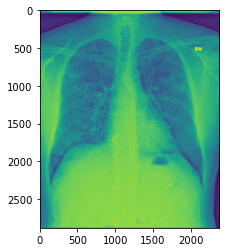

In [105]:
import matplotlib.pyplot as plt
plt.imshow(img)

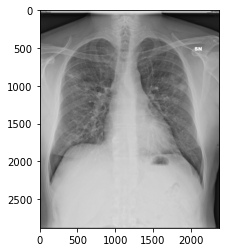

In [106]:
plt.imshow(img, cmap='gray')

In [107]:
img.shape

(2880, 2376)

In [110]:
img_resized = cv2.resize(img,(299, 299))

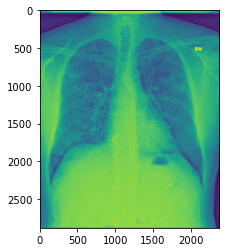

In [111]:
plt.imshow(img)

In [113]:
img_resized.shape

(299, 299)

ถ้าอ่านธรรมดาจะได้ 3 layer

In [85]:
image = Image.open('/Users/thanakornwongsanit/Downloads/CSproject/Dataset/resize/aaad.jpg')
print(image)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2376x2880 at 0x7F9C5BD20250>


In [88]:
image.size

(2376, 2880)

# chang to grey scale, resize, save

In [116]:
# importing os module
import os
# importing shutil module
import shutil
from PIL import Image

# Source path
source = "/Users/thanakornwongsanit/Downloads/CSproject/OriginalDataset/covid-chestxray-dataset-master/images/"
# Destination path
destination = "/Users/thanakornwongsanit/Downloads/CSproject/Dataset/COVID/"

for i in series:
    s = source+i
    d = destination+i
    # Copy and resize the content of
    # source to destination
    path = source+i
    image = cv2.imread( path, 0)
    print(f"Original size : {image.shape}")
    img_resized = cv2.resize(image,(299, 299))
    path_save = destination+i
    cv2.imwrite(path_save, img_resized)

Original size : (888, 882)
Original size : (891, 880)
Original size : (876, 882)
Original size : (874, 880)
Original size : (1272, 1645)
Original size : (1308, 1652)
Original size : (1402, 1401)
Original size : (1412, 1404)
Original size : (1148, 2563)
Original size : (630, 700)
Original size : (842, 1090)
Original size : (874, 1104)
Original size : (1439, 1800)
Original size : (841, 1107)
Original size : (1570, 1695)
Original size : (1333, 1118)
Original size : (1332, 1175)
Original size : (1330, 1187)
Original size : (4095, 3342)
Original size : (342, 417)
Original size : (341, 417)
Original size : (341, 416)
Original size : (1343, 1300)
Original size : (1163, 1165)
Original size : (1161, 1170)
Original size : (1165, 1165)
Original size : (1161, 1166)
Original size : (3368, 2800)
Original size : (1262, 1446)
Original size : (2840, 2972)
Original size : (2190, 2567)
Original size : (1835, 2386)
Original size : (1442, 1727)
Original size : (1243, 1249)
Original size : (3480, 4248)
Orig

Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size : (2000, 2000)
Original size 